## Load the SQL extension and establish a connection with the database

In [4]:
%load_ext sql

In [5]:
import csv, sqlite3
import prettytable
import pandas as pd
conn = sqlite3.connect('socioEconomicData.db')
cur = conn.cursor()
%sql sqlite:///socioEconomicData.db

In [9]:
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql('socioEconomicData', conn, if_exists='replace', index=False, method="multi")
prettytable.DEFAULT = 'DEFAULT'

In [25]:
res = %sql SELECT * FROM socioEconomicData;
df = pd.read_sql_query('SELECT * FROM socioEconomicData', conn)
print(df.head())

 * sqlite:///socioEconomicData.db
Done.
    ca community_area_name  percent_of_housing_crowded  \
0  1.0         Rogers Park                         7.7   
1  2.0          West Ridge                         7.8   
2  3.0              Uptown                         3.8   
3  4.0      Lincoln Square                         3.4   
4  5.0        North Center                         0.3   

   percent_households_below_poverty  percent_aged_16_unemployed  \
0                              23.6                         8.7   
1                              17.2                         8.8   
2                              24.0                         8.9   
3                              10.9                         8.2   
4                               7.5                         5.2   

   percent_aged_25_without_high_school_diploma  \
0                                         18.2   
1                                         20.8   
2                                         11.8   
3       

### Problem 1: How many rows are in the dataset?

In [24]:
res = %sql SELECT COUNT(*) as Total_Dataset FROM socioEconomicData;
print(res)

 * sqlite:///socioEconomicData.db
Done.
+---------------+
| Total_Dataset |
+---------------+
|       78      |
+---------------+


### Problem 2: How many community areas in Chicago have a hardship index greater than 50.0?

In [28]:
total_community_area_name = %sql SELECT COUNT(*) FROM socioEconomicData WHERE hardship_index > 50.0;
print(total_community_area_name)

 * sqlite:///socioEconomicData.db
Done.
+----------+
| COUNT(*) |
+----------+
|    38    |
+----------+


### Problem 3: What is the maximum value of hardship index in this dataset?¶

In [30]:
max_val_hardship = %sql SELECT MAX(hardship_index) as Max_Hardship_value FROM socioEconomicData;
print(max_val_hardship)

 * sqlite:///socioEconomicData.db
Done.
+--------------------+
| Max_Hardship_value |
+--------------------+
|        98.0        |
+--------------------+


### Problem 4: Which community area which has the highest hardship index?

In [34]:
highest_hardship_index = %sql SELECT community_area_name FROM socioEconomicData WHERE hardship_index = (SELECT MAX(hardship_index) FROM socioEconomicData)
print(highest_hardship_index)
## Alternative
# res2 = %sql SELECT community_area_name FROM socioEconomicData ORDER BY hardship_index DESC LIMIT 1;
# print(res2)

 * sqlite:///socioEconomicData.db
Done.
+---------------------+
| community_area_name |
+---------------------+
|      Riverdale      |
+---------------------+


### Problem 5: Which Chicago community areas have per-capita incomes greater than $60,000?

In [36]:
per_capita = %sql SELECT community_area_name FROM socioEconomicData WHERE per_capita_income_ > 60000;
print(per_capita)

 * sqlite:///socioEconomicData.db
Done.
+---------------------+
| community_area_name |
+---------------------+
|      Lake View      |
|     Lincoln Park    |
|   Near North Side   |
|         Loop        |
+---------------------+


### Problem 6: Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.

In [40]:
combined_data = %sql SELECT per_capita_income_ AS PER_CAPITA, hardship_index AS HARDSHIP FROM socioEconomicData;
df = pd.DataFrame(combined_data)
df.head()

 * sqlite:///socioEconomicData.db
Done.


,PER_CAPITA,HARDSHIP
0,23939,39.0
1,23040,46.0
2,35787,20.0
3,37524,17.0
4,57123,6.0


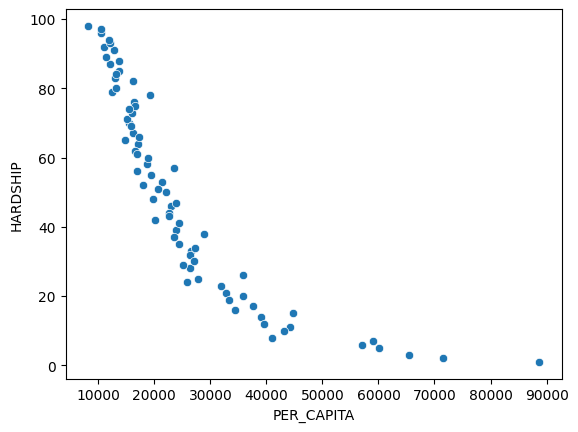

In [44]:
import seaborn as sns
plot = sns.scatterplot(x = 'PER_CAPITA', y = 'HARDSHIP', data = df)

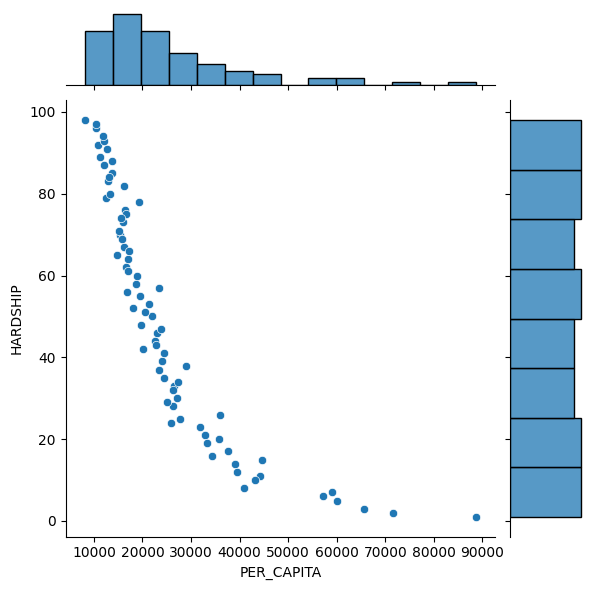

In [45]:
plot2 = sns.jointplot(x = 'PER_CAPITA', y = 'HARDSHIP', data = df)